## Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading data

In [2]:
df = pd.read_csv("Tweets.csv")
df.head()

,airline_sentiment,text
0,neutral,@USAirways Is there a phone line to call into ...
1,positive,@united Bag was finally delivered and intact. ...
2,positive,@usairways Thanks to Kevin and team at F38ish ...
3,negative,"@AmericanAir Yes, talked to them. FLL says is ..."
4,negative,@VirginAmerica and it's a really big bad thing...


## Separating data into Positive, negative and neutral

In [0]:
def splitter(dataset):
    positive = []
    neutral  = []
    negative = []
    for i, val in dataset.iterrows() :
        if val['airline_sentiment'] == 'positive' :
            positive.append(val['text'])
        if val['airline_sentiment'] == 'neutral' :
            neutral.append(val['text'])
        if val['airline_sentiment'] == 'negative' :
            negative.append(val['text'])
    return [positive, neutral, negative]

In [0]:
dataset = splitter(df)

In [0]:
data = []
for i,val in enumerate(dataset) :
    temp = []
    for j,val2 in enumerate(dataset[i]):
        temp2 = dataset[i][j].split()
        temp.append(temp2)
    data.append(temp)

## Making a set of words used in data

In [0]:
word_set = set()
for i, val in enumerate(data):
    for j , val2 in enumerate(data[i]) :
        word_set.update(data[i][j])
        
length = len(word_set)

## Making dictionary of words

In [0]:
i = 0
dictionary = {}
for j in word_set:
    dictionary[j] = i
    i+=1

## Represinting data into bag of words

In [0]:
def bag_of_word(data, length) :
    global dictionary
    ret = []
    for i, val in enumerate(data) :
        temp = []
        for j, val2 in enumerate(data[i]) :
            temp2 = [0]*length
            for k, val3 in enumerate(data[i][j]) :
                try:
                    index = dictionary[data[i][j][k]]
                    temp2[index]+=1
                except:
                    continue
            temp.append(temp2)
        ret.append(temp)
    return ret

In [0]:
bag = bag_of_word(data, length)

## Stratifiend splitting data with 80:20 ratio

In [0]:
def split_(data) :
    len_pos= len(data[0])
    len_neg = len(data[2])
    len_neu = len(data[1])
    train = []
    test = []
    train.append(data[0][0:int(0.8*len_pos)])
    train.append(data[2][0:int(0.8*len_neg)])
    train.append(data[1][0:int(0.8*len_neu)])
    test.append(data[0][int(0.8*len_pos):])
    test.append(data[2][int(0.8*len_neg):])
    test.append(data[1][int(0.8*len_neu):])
    return train, test

In [0]:
train, test = split_(bag)

## Training of Data (next two cell)

In [0]:
p_pos = np.log(len(train[0])/float(len(train[0])+len(train[1])+len(train[2])))
p_neg = np.log(len(train[1])/float(len(train[0])+len(train[1])+len(train[2])))
p_neu = np.log(len(train[2])/float(len(train[0])+len(train[1])+len(train[2])))
p = [p_pos,p_neg,p_neu]

In [0]:
train_sum = []
for i,_  in enumerate(train):
    temp = np.sum(train[i], axis= 0)
    temp = np.add(temp,1)
    temp = np.true_divide(temp, np.sum(temp))
    train_sum.append(np.log(temp))

## Predictiong test data

In [0]:
def predict(test):
    global train_sum, p
    s = []
    for i in range(3):
      ans = 0
      for j,_ in enumerate(test):
        for k in range(test[j]):
          ans += train_sum[i][j]
      final = p[i]+ans
      s.append(final)
    return np.argmax(s)


## Test Accuracy

In [50]:
total = len(test[0]+test[1]+test[2])
confusion = [[0]*3 for _ in range(3) ]
accuracy = 0
for i, val in enumerate(test):
  for j,_ in enumerate(test[i]):
    z = predict(test[i][j])
    if z == i :
      accuracy +=1
    if z == 0 :
      if i == 0 :
        confusion[0][0]+=1
      if i == 1 :
        confusion[0][1] +=1
      if i == 2:
        confusion[0][2] +=1
    if z == 1 :
      if i == 0 :
        confusion[1][0]+=1
      if i == 1 :
        confusion[1][1] +=1
      if i == 2:
        confusion[1][2] +=1
    if z == 2 :
      if i == 0 :
        confusion[2][0]+=1
      if i == 1 :
        confusion[2][1] +=1
      if i == 2:
        confusion[2][2] +=1
print('accuracy : ', accuracy/total)

accuracy :  0.7494025264595425


## Confusion Matrix

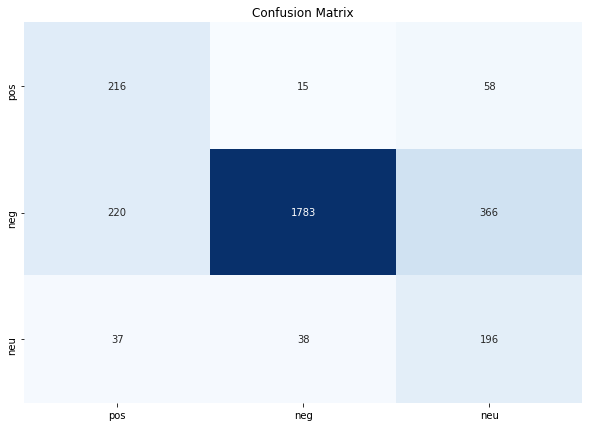

In [53]:
df_cm = pd.DataFrame(confusion, index = [i for i in ['pos', 'neg', 'neu']],columns = [i for i in ['pos', 'neg', 'neu']])
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix')
sn.heatmap(df_cm, annot=True, fmt='g', cbar = False, cmap = 'Blues')     
plt.show()

In [0]:
TP1 = confusion[0][0]
TP2 = confusion[1][1]
TP3 = confusion[2][2]
TN1 = confusion[1][1] + confusion[1][2] + confusion[2][1] + confusion[2][2]
TN2 = confusion[0][0] + confusion[0][2] + confusion[2][0] + confusion[2][2]
TN3 = confusion[0][0] + confusion[0][1] + confusion[1][0] + confusion[1][1]
FP1 = confusion[0][1] + confusion[0][2]
FP2 = confusion[1][0] + confusion[1][2]
FP3 = confusion[2][0] + confusion[2][1]
FN1 = confusion[1][0] + confusion[2][0]
FN2 = confusion[0][1] + confusion[2][1]
FN3 = confusion[0][2] + confusion[1][2]

In [0]:
P1 = TP1/float(TP1+FP1)
P2 = TP2/float(TP2+FP2)
P3 = TP3/float(TP3+FP3)
R1 = TP1/float(TP1+FN1)
R2 = TP2/float(TP2+FN2)
R3 = TP3/float(TP3+FN3)

## Micro-Average stats

In [56]:
Precision = (TP1+TP2+TP3)/float(TP1+TP2+TP3+FP1+FP2+FP3)
Recall = (TP1+TP2+TP3)/float(TP1+TP2+TP3+FN1+FN2+FN3)
F1_score = 2*(Precision*Recall)/float(Precision+Recall)

print(' Micro-Average Precison is : ', Precision)
print(' Micro-average Recall is : ', Recall)
print(' Micro-average F1-score is : ', F1_score)

 Micro-Average Precison is :  0.7494025264595425
 Micro-average Recall is :  0.7494025264595425
 Micro-average F1-score is :  0.7494025264595425


## Macro-Average stats

In [57]:
Precision_ = (P1+P2+P3)/3
Recall_ = (R1+R2+R3)/3
F1_score_ = 2*(Precision_*Recall_)/float(Precision_+Recall_)

print(' Macro-Average Precison is : ', Precision_)
print(' Macro-average Recall is : ', Recall_)
print(' Macro-average F1-score is : ', F1_score_)

 Macro-Average Precison is :  0.7410967735825954
 Macro-average Recall is :  0.5813071831039559
 Macro-average F1-score is :  0.6515480775453278
